In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import HeBz

In [2]:
def plot_benzene(ax):
    c = HeBz.benzene()
    for i in range(6):
        ax.plot([c[i][1],c[i+6][1]],[c[i][2],c[i+6][2]],'.-',color='lavender')
    for j in range(6):
        ax.plot([c[j][1],c[(j+1) % 6][1]],[c[j][2],c[(j+1) % 6][2]],'.-',color='black')
    return True

In [5]:
f2 = open('../data/pimc-fixed/gce-planeavedensity-02.000-020.000--012.000-0.00500-25dc780d-0670-4d96-a4c0-20e7f7aef40e.dat','r')
rho9 = np.genfromtxt(f2,skip_header=3)
rho9 = np.reshape(rho9,(205,205))
f2.close()
f2 = open('../data/pimc-fixed/gce-planeavedensity-02.000-020.000--029.000-0.00500-e79b7823-8c54-4a28-8a59-6110a9c916ff.dat','r')
rho22 = np.genfromtxt(f2,skip_header=3)
rho22 = np.reshape(rho22,(205,205))
f2.close()
f2 = open('../data/pimc-fixed/gce-planeavedensity-02.000-020.000--045.000-0.00500-6511a34e-7973-49d7-a13c-cff9a634059b.dat','r')
rho36 = np.genfromtxt(f2,skip_header=3)
rho36 = np.reshape(rho36,(205,205))
f2.close()
x = np.arange(-10,10,9.756098E-02)
y = np.arange(-10,10,9.756098E-02)
f2 = open('../data/pimc-fixed/gce-planeavedensity-02.000-020.000--065.000-0.00500-d7bc3fa5-2c9a-46b9-8c22-fdcc3c682235.dat','r')
rho60 = np.genfromtxt(f2,skip_header=3)
rho60 = np.reshape(rho60,(205,205))
f2.close()

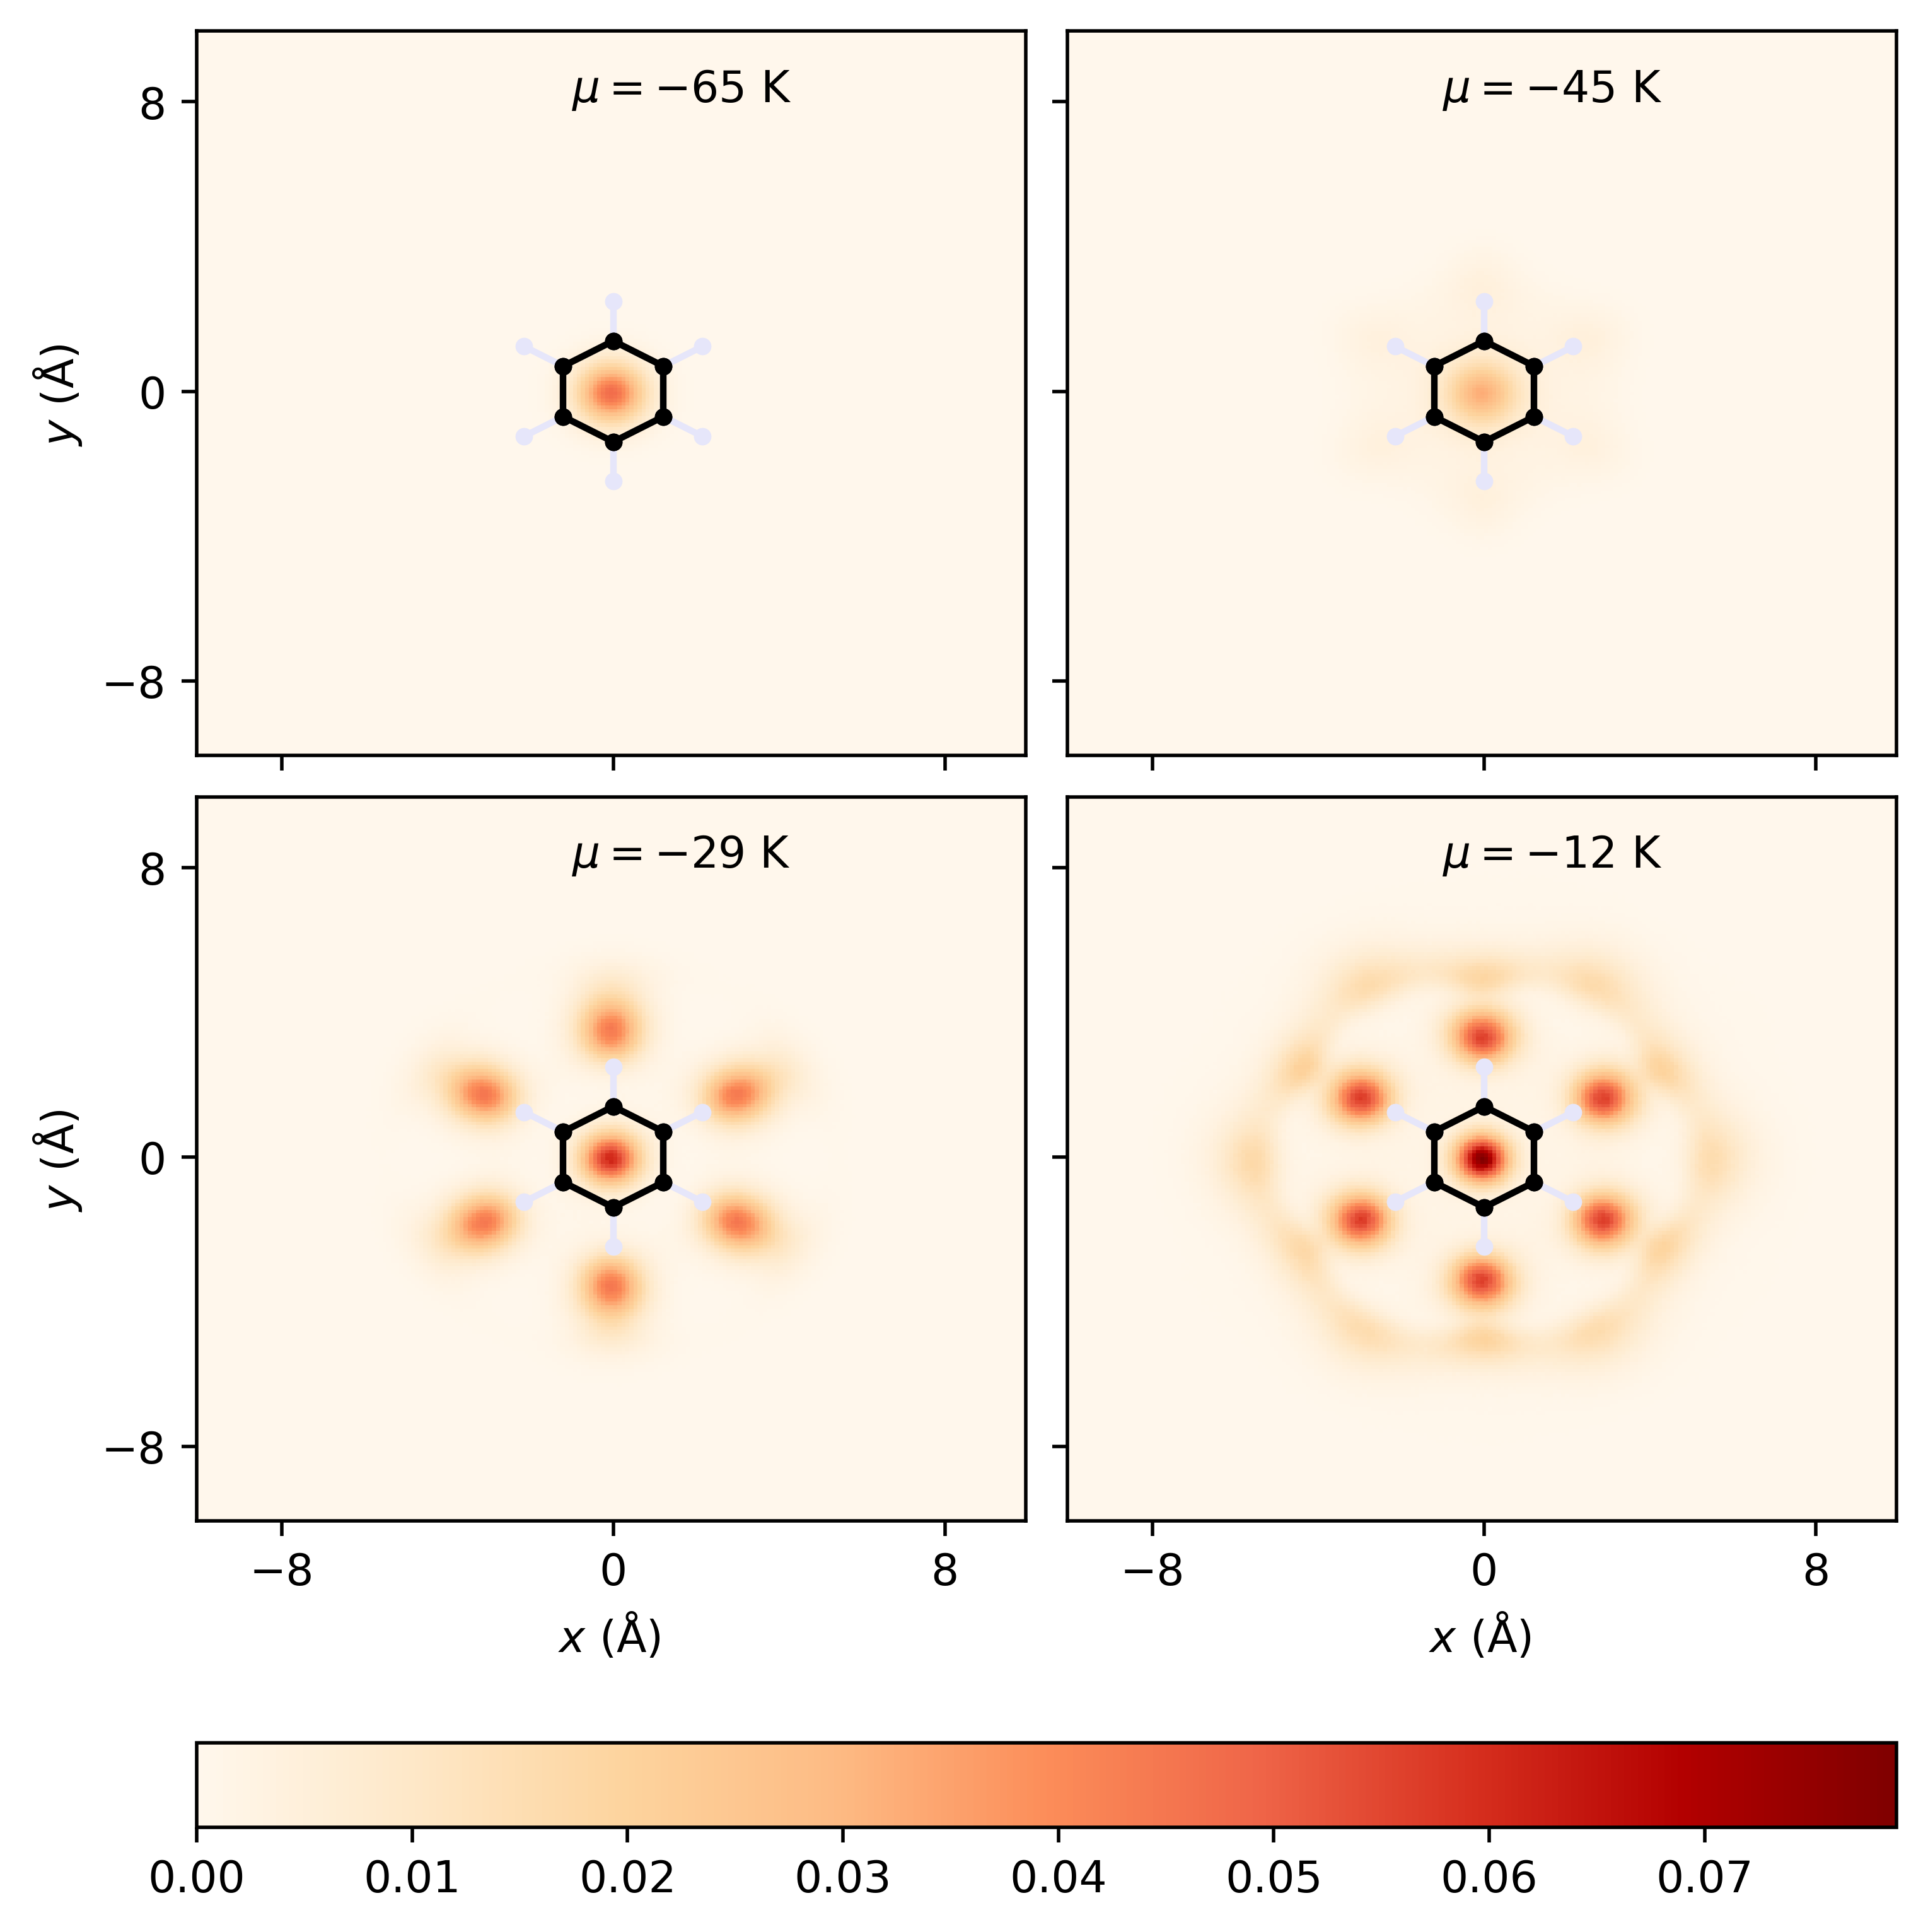

In [7]:
fig, axs = plt.subplots(2,2,figsize=(6,6),sharex=True, sharey=True, constrained_layout=True)
plt.gcf().set_dpi(500)
from matplotlib import colors

datasets = [rho60,rho36,rho22,rho9]
mus = [65,45,29,12]
# create a single norm to be shared across all images
norm = colors.Normalize(vmin=np.min(datasets), vmax=np.max(datasets))

images = []
for ax, data, mu in zip(axs.flat, datasets, mus):
    ax.text(-1,8,r'$\mu = -%2d$ K' % (mu))
    images.append(ax.pcolormesh(x,y,data, norm=norm, cmap = 'OrRd'))
    plot_benzene(ax)
axs.flat[0].set_yticks([-8.0,0,8.0])
axs.flat[0].set_xticks([-8.0,0,8.0])
axs.flat[3].set_xlabel(r'$x$ (Å) ')
axs.flat[0].set_ylabel(r'$y$ (Å) ')
axs.flat[2].set_ylabel(r'$y$ (Å) ')
axs.flat[2].set_xlabel(r'$x$ (Å) ')
fig.colorbar(images[0], ax=axs, orientation='horizontal', fraction=.1)
plt.savefig('../figures/Fig9a.svg')